In [52]:
import sys
assert sys.version_info >= (3, 5)

import sklearn
assert sklearn.__version__ >= "0.20"

import numpy as np
import os

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

import pandas as pd
import os
import tarfile
import urllib.request

PROJECT_ROOT_DIR = "."
CHAPTER_ID = "classification"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [53]:
ts=pd.read_csv("Features_testset.csv")
df=pd.read_csv("Features_trainvalidation.csv")

In [54]:
df.describe()

,NComp,Comp_L2Norm,Comp_L3Norm,Comp_L5Norm,Comp_L7Norm,Comp_L10Norm,mean_Number,maxdiff_Number,dev_Number,max_Number,...,frac_sValence,frac_pValence,frac_dValence,frac_fValence,CanFormIonic,MaxIonicChar,MeanIonicChar,Index,TotalEnergy,Bandgap
count,44174.000000,44174.000000,44174.000000,44174.000000,44174.000000,44174.000000,44174.000000,44174.000000,44174.000000,44174.000000,...,44174.000000,44174.000000,44174.000000,44174.000000,44174.000000,44174.000000,44174.000000,44174.000000,44174.000000,44174.000000
mean,2.921968,0.649572,0.584268,0.551721,0.543117,0.538253,39.136690,40.279486,14.351893,61.749264,...,0.225878,0.132151,0.439213,0.202758,0.215715,0.286594,0.108304,88347.000000,-5.720376,0.427692
std,0.572382,0.076830,0.097160,0.112877,0.119063,0.123463,16.441628,20.536967,7.818007,19.114566,...,0.145958,0.161999,0.228714,0.213150,0.411322,0.248945,0.102115,51008.318929,2.230297,1.196584
min,1.000000,0.447214,0.341995,0.275946,0.251700,0.234924,1.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,-15.154200,0.000000
25%,3.000000,0.600000,0.517872,0.481796,0.467168,0.459210,26.587500,25.000000,8.375925,48.000000,...,0.131579,0.000000,0.280000,0.000000,0.000000,0.097332,0.033707,44174.000000,-7.222000,0.000000
50%,3.000000,0.612372,0.538609,0.506099,0.501109,0.500098,38.000000,39.000000,13.719504,65.000000,...,0.187500,0.064516,0.444444,0.157003,0.000000,0.213451,0.073640,88347.000000,-5.601150,0.000000
75%,3.000000,0.707107,0.642563,0.615030,0.604895,0.601032,50.500000,56.000000,19.555556,78.000000,...,0.279070,0.195652,0.612903,0.384615,0.000000,0.391662,0.149160,132520.000000,-4.045900,0.000000
max,7.000000,1.000000,1.000000,1.000000,1.000000,1.000000,94.000000,93.000000,43.500000,94.000000,...,1.000000,0.714286,1.000000,0.866667,1.000000,0.921450,0.460725,176693.000000,-0.041300,10.117100


In [55]:
corr_matrix = df.corr()
corr_matrix["Bandgap"].sort_values(ascending=False)

Bandgap                  1.000000
frac_pValence            0.610560
CanFormIonic             0.601729
max_Electronegativity    0.547372
MeanIonicChar            0.536014
                           ...   
mean_Row                -0.435002
most_CovalentRadius     -0.450047
min_CovalentRadius      -0.464661
most_SpaceGroupNumber   -0.488442
mean_SpaceGroupNumber   -0.491685
Name: Bandgap, Length: 148, dtype: float64

In [56]:
#상관관계 -0.2 ~ 0.2 feature 색인
corr_matrix_2 = pd.DataFrame(corr_matrix.iloc[-1,:]).T

throw_away_col = []
for col in corr_matrix_2:
    if abs(-0.2 <= corr_matrix_2[col][0]) <= 0.2:
        throw_away_col.append(col)
print(throw_away_col)

['mean_Number', 'min_Number', 'most_Number', 'mean_AtomicWeight', 'min_AtomicWeight', 'most_AtomicWeight', 'mean_MeltingT', 'min_MeltingT', 'most_MeltingT', 'mean_Row', 'min_Row', 'most_Row', 'mean_CovalentRadius', 'min_CovalentRadius', 'most_CovalentRadius', 'mean_NdValence', 'max_NdValence', 'most_NdValence', 'mean_NValance', 'mean_NdUnfilled', 'mean_NUnfilled', 'most_NUnfilled', 'mean_SpaceGroupNumber', 'min_SpaceGroupNumber', 'most_SpaceGroupNumber', 'frac_dValence']


In [57]:
#상관관계 낮은 피쳐 제거
df.drop(['mean_Number', 'min_Number', 'most_Number', 'mean_AtomicWeight', 'min_AtomicWeight', 'most_AtomicWeight', 'mean_MeltingT', 'min_MeltingT', 'most_MeltingT', 'mean_Row', 'min_Row', 'most_Row', 'mean_CovalentRadius', 'min_CovalentRadius', 'most_CovalentRadius', 'mean_NdValence', 'max_NdValence', 'most_NdValence', 'mean_NValance', 'mean_NdUnfilled', 'mean_NUnfilled', 'most_NUnfilled', 'mean_SpaceGroupNumber', 'min_SpaceGroupNumber', 'most_SpaceGroupNumber', 'frac_dValence']
              , axis = 1, inplace = True)

ts.drop(['mean_Number', 'min_Number', 'most_Number', 'mean_AtomicWeight', 'min_AtomicWeight', 'most_AtomicWeight', 'mean_MeltingT', 'min_MeltingT', 'most_MeltingT', 'mean_Row', 'min_Row', 'most_Row', 'mean_CovalentRadius', 'min_CovalentRadius', 'most_CovalentRadius', 'mean_NdValence', 'max_NdValence', 'most_NdValence', 'mean_NValance', 'mean_NdUnfilled', 'mean_NUnfilled', 'most_NUnfilled', 'mean_SpaceGroupNumber', 'min_SpaceGroupNumber', 'most_SpaceGroupNumber', 'frac_dValence']
              , axis = 1, inplace = True)

In [58]:
#x, y로 데이터 분리
x_df = df.drop(['Index', 'TotalEnergy','Bandgap'], axis=1)
y_df = df['Bandgap']

In [59]:
x_df_s = x_df.copy()
level_1q = x_df_s.quantile(0.25)
level_3q = x_df_s.quantile(0.75)
IQR = level_3q - level_1q
rev_range = 3  # 제거 범위 조절 변수
dff = x_df_s[(x_df_s <= level_3q + (rev_range * IQR)) & (x_df_s >= level_1q - (rev_range * IQR))]
dff = dff.reset_index(drop=True)

{'whiskers': [<matplotlib.lines.Line2D at 0x1c6ed2cf7f0>,
 'caps': [<matplotlib.lines.Line2D at 0x1c6ed2b5280>,
 'boxes': [<matplotlib.lines.Line2D at 0x1c6ed2cf580>],
 'medians': [<matplotlib.lines.Line2D at 0x1c6ed2b5dc0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1c6ed2b5040>],
 'means': []}

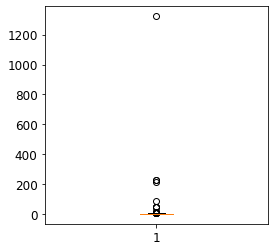

In [60]:
fig, ax = plt.subplots(1,1, figsize=(4,4))
a = list(x_df.iloc[0])

ax.boxplot(a)

In [61]:
df

,NComp,Comp_L2Norm,Comp_L3Norm,Comp_L5Norm,Comp_L7Norm,Comp_L10Norm,maxdiff_Number,dev_Number,max_Number,mean_MendeleevNumber,...,max_SpaceGroupNumber,frac_sValence,frac_pValence,frac_fValence,CanFormIonic,MaxIonicChar,MeanIonicChar,Index,TotalEnergy,Bandgap
0,1,1.000000,1.000000,1.000000,1.000000,1.000000,0,0.000000,89,14.000000,...,225,0.666667,0.000000,0.000000,0,0.000000,0.000000,1,-4.4803,0.0
1,1,1.000000,1.000000,1.000000,1.000000,1.000000,0,0.000000,47,65.000000,...,225,0.090909,0.000000,0.000000,0,0.000000,0.000000,5,-3.2681,0.0
2,2,0.745356,0.693361,0.670782,0.667408,0.666732,32,14.222222,79,65.333333,...,225,0.063830,0.000000,0.297872,0,0.088829,0.039480,9,-3.5294,0.0
3,2,0.745356,0.693361,0.670782,0.667408,0.666732,32,14.222222,79,65.333333,...,225,0.063830,0.000000,0.297872,0,0.088829,0.039480,13,-3.5643,0.0
4,2,0.745356,0.693361,0.670782,0.667408,0.666732,32,14.222222,79,65.333333,...,225,0.063830,0.000000,0.297872,0,0.088829,0.039480,17,-3.4825,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44169,3,0.577350,0.480750,0.415244,0.389977,0.372041,13,5.555556,53,76.666667,...,194,0.162162,0.243243,0.000000,0,0.357395,0.126792,176677,-5.7258,0.0
44170,2,0.707107,0.629961,0.574349,0.552045,0.535887,41,20.500000,81,60.000000,...,194,0.129032,0.032258,0.451613,0,0.020806,0.010403,176681,-5.9999,0.0
44171,2,0.707107,0.629961,0.574349,0.552045,0.535887,41,20.500000,81,60.000000,...,194,0.129032,0.032258,0.451613,0,0.020806,0.010403,176685,-5.9188,0.0
44172,2,0.849837,0.835550,0.833387,0.833335,0.833333,41,11.388889,81,70.666667,...,194,0.086331,0.035971,0.503597,0,0.020806,0.005779,176689,-3.6791,0.0


In [62]:
#Bandgap 0과 1로 분류
y_df=y_df.apply(lambda x: 0 if x==0 else 1)

In [63]:
from sklearn.model_selection import train_test_split

x_train_1, x_test, y_train_1, y_test = train_test_split(x_df, y_df, test_size = 0.2, 
                                                  shuffle = True, #계층샘플링
                                                    stratify=y_df,
                                                  random_state = 42)

In [64]:
x_train, x_val, y_train, y_val = train_test_split(x_train_1, 
                                                  y_train_1, 
                                                  test_size = 0.2, 
                                                  shuffle = True,
                                                  stratify=y_train_1,
                                                  random_state = 42)

In [65]:
print("x_train_1:",x_train_1.shape)
print("y_train_1:",y_train_1.shape)
print("x_test:",x_test.shape)
print("y_test:", y_test.shape)
print("x_train:",x_train.shape)
print("y_train:",y_train.shape)
print("x_val:",x_val.shape)
print("y_val:", y_val.shape)

x_train_1: (35339, 119)
y_train_1: (35339,)
x_test: (8835, 119)
y_test: (8835,)
x_train: (28271, 119)
y_train: (28271,)
x_val: (7068, 119)
y_val: (7068,)


In [66]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
x_train=scaler.fit_transform(x_train)
x_train_1=scaler.fit_transform(x_train_1)
x_val=scaler.fit_transform(x_val)
x_test=scaler.fit_transform(x_test)

In [67]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X2D = pca.fit_transform(x_train_1)

In [68]:
x_train_1.shape

(35339, 119)

In [69]:
x_train

array([[0.4       , 0.47015119, 0.50386381, ..., 0.        , 0.3509317 ,
        0.12966714],
       [0.4       , 0.23541945, 0.21087181, ..., 0.        , 0.24429191,
        0.20107193],
       [0.4       , 0.29877515, 0.2988025 , ..., 0.        , 0.06575171,
        0.05703048],
       ...,
       [0.2       , 0.53934466, 0.53398711, ..., 0.        , 0.02414537,
        0.0215803 ],
       [0.4       , 0.2763932 , 0.26179311, ..., 0.        , 0.2744941 ,
        0.15477357],
       [0.2       , 0.53934466, 0.53398711, ..., 0.        , 0.03651412,
        0.03263506]])

# SGDClassifier

In [70]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(max_iter=1000, tol=1e-3, random_state=42)
sgd_clf.fit(x_train_1, y_train_1)

SGDClassifier(random_state=42)

In [71]:
#교차 검증

from sklearn.model_selection import cross_val_predict
y_train_pred1 = cross_val_predict(sgd_clf, x_train, y_train, cv=15)

In [72]:
y_train_pred1.shape

(28271,)

In [73]:
y_train.shape

(28271,)

In [74]:
y_test_pred = sgd_clf.predict(x_test)
y_test_pred.shape

(8835,)

In [75]:
#confusion matrix

from sklearn.metrics import confusion_matrix
confusion_matrix(y_train, y_train_pred1)

array([[21701,  1279],
       [  967,  4324]], dtype=int64)

In [76]:
confusion_matrix(y_test, y_test_pred)

array([[6868,  313],
       [ 367, 1287]], dtype=int64)

In [77]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, r2_score
precision_train = precision_score(y_train,y_train_pred1)
accuracy_train = accuracy_score(y_train,y_train_pred1)
recall_train = recall_score(y_train,y_train_pred1)
f1_score_train = f1_score(y_train,y_train_pred1)

precision_test = precision_score(y_test,y_test_pred)
accuracy_test = accuracy_score(y_test,y_test_pred)
recall_test = recall_score(y_test,y_test_pred)
f1_score_test = f1_score(y_test,y_test_pred)

print("precision train :" , precision_train)
print("accuracy train :" , accuracy_train)
print("recall train :" , recall_train)
print("f1_score train :" , f1_score_train)

print("\nprecision test :" , precision_test)
print("accuracy test :" , accuracy_test)
print("recall test :" , recall_test)
print("f1_score test :" , f1_score_test)

precision train : 0.7717294306621453
accuracy train : 0.9205546319550069
recall train : 0.8172368172368173
f1_score train : 0.7938314668624932

precision test : 0.804375
accuracy test : 0.923033389926429
recall test : 0.7781136638452237
f1_score test : 0.7910264290104486


In [78]:
# 결과값을 함수로 정의

def test_score_set(data):  
    class_name=['Positive','Negative']
    plt.figure()

    plot_confusion_matrix(data,
                          x_test,y_test,
                          display_labels =class_name ,
                          cmap=plt.cm.Blues)
    plt.show()
    
    a = accuracy_score(y_test, pred_test)
    print("accuracy : ", a)
    p = precision_score(y_test, pred_test)
    print("precision : ", p)
    r = recall_score(y_test, pred_test)
    print("recall : ", r)
    f1 = f1_score(y_test, pred_test)
    print("f1_score : ",f1)
    roc = roc_auc_score(y_test, pred_test)
    print("roc_auc_score : ",roc)

In [84]:
def val_score_set(data):  
    class_name=['Positive','Negative']
    plt.figure()

    plot_confusion_matrix(data,
                          x_val,y_val,
                          display_labels =class_name ,
                          cmap=plt.cm.Reds)
    plt.show()
    
    a = accuracy_score(y_val,pred_test_2)
    print("accuracy : ", a)
    p = precision_score(y_val,pred_test_2)
    print("precision : ", p)
    r = recall_score(y_val,pred_test_2)
    print("recall : ", r)
    f1 = f1_score(y_val,pred_test_2)
    print("f1_score : ",f1)
    roc = roc_auc_score(y_val,pred_test_2)
    print("roc_auc_score : ",roc)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


<Figure size 432x288 with 0 Axes>

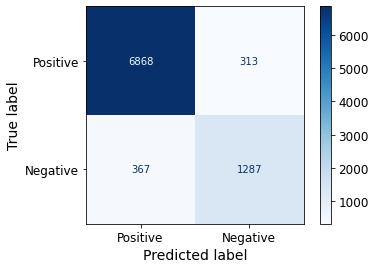

accuracy :  0.923033389926429
precision :  0.804375
recall :  0.7781136638452237
f1_score :  0.7910264290104486
roc_auc_score :  0.8672632098644028


In [85]:
# confusion matrix를 plot
# 함수를 이용한 결과값 출력

from sklearn.metrics import plot_confusion_matrix

sgd = SGDClassifier(max_iter=1000, tol=1e-3, random_state=42) 
sgd.fit(x_train_1, y_train_1)
pred_test=sgd.predict(x_test)

test_score_set(sgd)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


<Figure size 432x288 with 0 Axes>

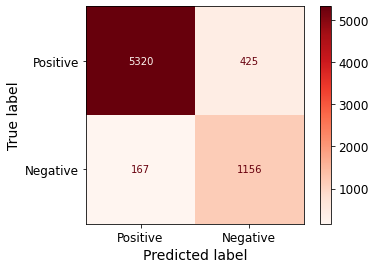

accuracy :  0.9162422184493492
precision :  0.7311827956989247
recall :  0.873771730914588
f1_score :  0.7961432506887053
roc_auc_score :  0.8998971796435429


In [86]:
from sklearn.metrics import plot_confusion_matrix

sgd = SGDClassifier(max_iter=1000, tol=1e-3, random_state=42) 
sgd.fit(x_train, y_train)
pred_test_2=sgd.predict(x_val)

val_score_set(sgd)

# Random Forest Model

In [87]:
from sklearn.ensemble import RandomForestClassifier
import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, r2_score
from sklearn.metrics import plot_confusion_matrix

In [88]:
def test_score_set(data):  
    class_name=['Positive','Negative']
    plt.figure()

    plot_confusion_matrix(data,
                          x_test,y_test,
                          display_labels =class_name ,
                          cmap=plt.cm.Blues)
    plt.show()
    
    a = accuracy_score(y_test,pred)
    print("accuracy : ", a)
    p = precision_score(y_test,pred)
    print("precision : ", p)
    r = recall_score(y_test,pred)
    print("recall : ", r)
    f1 = f1_score(y_test,pred)
    print("f1_score : ",f1)
    roc = roc_auc_score(y_test,pred)
    print("roc_auc_score : ",roc)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


<Figure size 432x288 with 0 Axes>

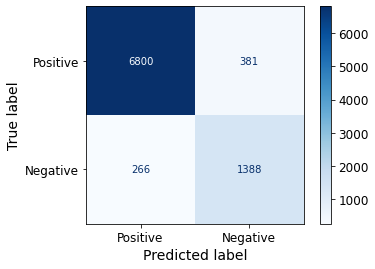

accuracy :  0.9267685342388229
precision :  0.784624081401922
recall :  0.8391777509068924
f1_score :  0.8109845165059889
roc_auc_score :  0.8930605367819521


In [89]:
#test 검증
#train_A

rfc = RandomForestClassifier(n_estimators=5, random_state=42) 
rfc.fit(x_train_1, y_train_1)
pred=rfc.predict(x_test)

test_score_set(rfc)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


<Figure size 432x288 with 0 Axes>

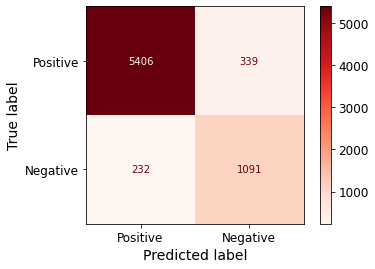

accuracy :  0.9162422184493492
precision :  0.7311827956989247
recall :  0.873771730914588
f1_score :  0.7961432506887053
roc_auc_score :  0.8998971796435429


In [90]:
#validation 검증
rfc = RandomForestClassifier(n_estimators=5, random_state=42) 
rfc.fit(x_train, y_train)
pred=rfc.predict(x_val)

val_score_set(rfc)